# Here, we build tools to generate and evaluate Newton polynomials

In [1]:
import numpy as np

In [ ]:
# this function takes as input n points with n function values
# output is a vector of coefficients of length n (coefficients of the nth newton polynomial)
def NewtonInterpolate(x,f):

    n = len(x)
    A = np.zeros((n,n),dtype=float)

    A[:,0] = f
    for j in range(1,n):
        for i in range(j,n):
            A[i,j] = (A[i,j-1]-A[i-1,j-1])/(x[i]-x[i-j])

    return(np.diag(A))
            

    

For below, we observe that Horner's scheme with the Newton basis is similar to that with the monomial basis, except that our polynomial is not $$\sum_{j=1}^n a_i x^i$$ but rather $$\sum_{j=1}^{n}a_i(\Pi_{i=1}^{j-1}(x-x_j)).$$ We can easly adjust the algorithm accordingly; see below.

In [3]:
# Horner scheme
# input = coeffs a, interp points x, and data points x of any length
# output: polynomial evaluaated at x
def Horner(a,x_interp,x):
    x_interp = np.array(x_interp)
    x = np.array(x)
    x = np.atleast_1d(x)
    size = len(x)
    n=len(a)
    p = np.full(size,fill_value=a[-1])
    for i in range(-2,-(n+1),-1):
        p = p*(x-x_interp[i]) + a[i]
    return (p)

Observe that the coefficient $$a_{k+1}=\frac{f_{k+1}-\sum_{j=1}^k\Pi_{i=1}^{j-1}(x_{k+1}-x_j)}{\Pi_{j=1}^k(x_{k+1}-x_j)}$$ which, via the cell above, is clearly $$a_{k+1}=\frac{f_{k+1} -p_{old}(x)}{\Pi_{j=1}^k(x_{k+1}-x_j)},$$ where $p_{old}$ is the polynomial that interpolates the first $n$ points. 


In [ ]:
# aold, xold both length n; 
# xnew, fnew both single points
def update_newton(aold,xold,xnew,fnew):
    # see Markdown above for logic
    if np.any(np.isclose(xold, xnew, atol=1.e-10)):
        raise ValueError(f"Your point {xnew} matches an old point. ")
    pold_x = Horner(aold,xold,xnew)[0]
    n = len(aold)
    prod=1
    for i in range(n):
        prod = prod*(xnew-xold[i])
    anew = np.zeros(n+1)
    anew[:-1] = aold
    anew[-1] = (fnew-pold_x)/prod
    return(anew)


Here, we test our interpolation on the functions below.

In [5]:
import matplotlib.pyplot as plt

In [6]:
def Exp(x):
    return(np.exp(-x**2))
def Sin(x):
    return(np.sin(2*x))
def Poly(x):
    return(x+x**2+x**3+x**4+x**5+x**6+x**7)

In [7]:



    
def get_interp_points(a,b,npoints,f):
    # input the bounds of an interval [a,b] on which you wish to interpolate, 
    # the number of interpolation points
    # and the function to interpolate

    # outputs the pair of vectors (points,function values)
    xs = np.linspace(a,b,npoints)
    fs = f(xs)
    return(xs,fs)


# master function
def plot_f_vs_interp(a,b,list_of_ns,f,fname=''):
    xs_plot = np.linspace(a,b,1000)
    fs_plot = f(xs_plot)
    for n in list_of_ns:
        xs,fs = get_interp_points(a,b,n,f)
        coeffs = NewtonInterpolate(xs,fs)
        fs_interp_plot = Horner(coeffs,xs,xs_plot)
        plt.plot(xs_plot,fs_interp_plot,label=f'Interpolating with {n} points.')
    plt.plot(xs_plot,fs_plot,'--b',label=fname)

    plt.title(f'Newton Interpolation of {fname}.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()




<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lv/0pc6y84s1s55p74gp083kxlh0000gn/T/ipykernel_92748/1615044432.py:2: SyntaxWarning: invalid escape sequence '\m'
  plot_f_vs_interp(-2,4,[5,10,20],Sin,fname='$\mathrm{sin}(2x)$')
/var/folders/lv/0pc6y84s1s55p74gp083kxlh0000gn/T/ipykernel_92748/1615044432.py:3: SyntaxWarning: invalid escape sequence '\s'
  plot_f_vs_interp(-2,4,[5,10,20],Poly,fname='$\sum_{i=1}^7 x^i$')


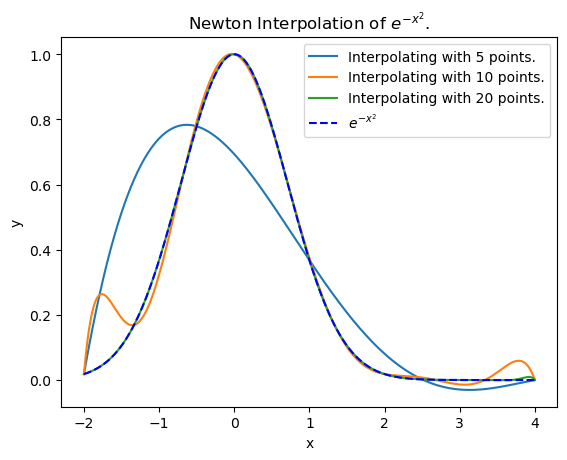

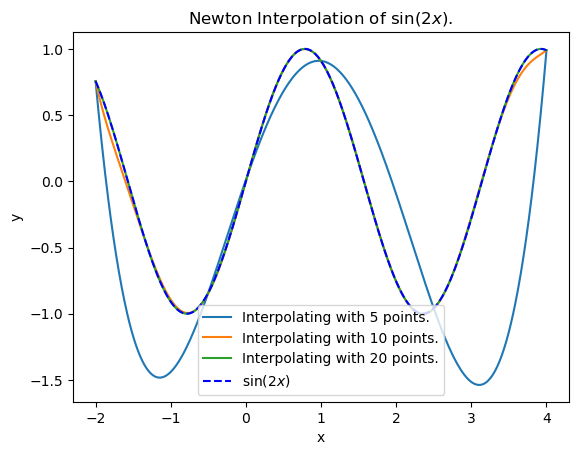

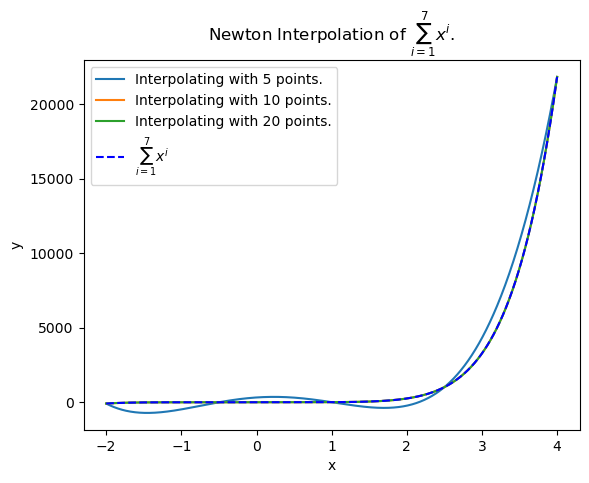

In [8]:
plot_f_vs_interp(-2,4,[5,10,20],Exp,fname='$e^{-x^2}$')
plot_f_vs_interp(-2,4,[5,10,20],Sin,fname='$\mathrm{sin}(2x)$')
plot_f_vs_interp(-2,4,[5,10,20],Poly,fname='$\sum_{i=1}^7 x^i$')

Here, we attempt to interpolate Runge's function, encounter problems, and add points to counteract those problems. 

In [9]:
def Runge(x):
    return(1/(1+x**2))

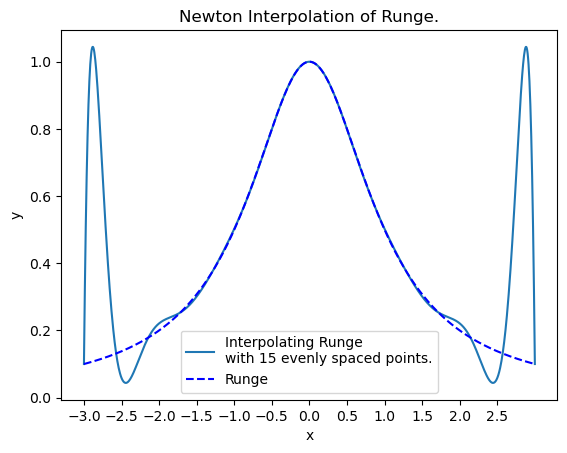

In [10]:

a,b=-3,3
xs_plot = np.linspace(a,b,1000)
fs_plot = Runge(xs_plot)

xs,fs = get_interp_points(a,b,15,Runge)
coeffs = NewtonInterpolate(xs,fs)
fs_interp_plot = Horner(coeffs,xs,xs_plot)

plt.plot(xs_plot,fs_interp_plot,label=f'Interpolating Runge\nwith 15 evenly spaced points.')
plt.plot(xs_plot,fs_plot,'--b',label='Runge')

plt.title(f'Newton Interpolation of Runge.')
plt.xlabel('x')
plt.xticks(np.arange(a,b,.5))
plt.ylabel('y')
plt.legend()
plt.show()

Here, we make our interpolation better by adding 4 points near the end.

In [11]:
extras = [-2.9,-2.8,2.8,2.9]
# extras = [-2.8,2.8]
for x in extras:

    coeffs = update_newton(coeffs,xs,x,Runge(x))
    xs = np.concatenate((xs,[x]))
    

Plot our updated function.

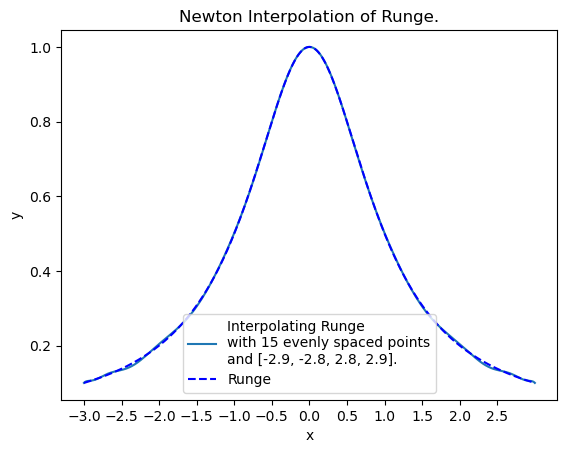

In [12]:
fs_interp_plot_updated = Horner(coeffs,xs,xs_plot)

plt.plot(xs_plot,fs_interp_plot_updated,label=f'Interpolating Runge\nwith 15 evenly spaced points\nand {extras}.')
plt.plot(xs_plot,fs_plot,'--b',label='Runge')

plt.title(f'Newton Interpolation of Runge.')
plt.xlabel('x')
plt.xticks(np.arange(a,b,.5))
plt.ylabel('y')
plt.legend()
plt.show()

### (f)

Here, we interpolate with Chebyshev points. 

In [ ]:
# returns chebyshev point i given, a,b,n
def get_cheb(i,a,b,n):
    lsum = 0.5*(a+b)
    rdif = 0.5*(b-a)
    c = np.cos((2*i-1)*np.pi/(2*n))
    return(lsum + rdif*c)


# input interval bounds [a,b] and number of points
def get_cheb_points(a,b,n):
    vals = np.arange(1,n+1,1)
    return(get_cheb(vals,a,b,n))

In [14]:
# calculates the Linfinity norm between a function and it's nth degree Newton polynomial interpolant,
# either with chebyshev or evenly spaced points
def get_Linf_norm(a,b,n,f,num_points=3001,cheb=False):
    # nth degree wants n+1 points?
    n=n+1 
    if cheb:
        xs_interp = get_cheb_points(a,b,n)
        fs_interp = f(xs_interp)
    else:
        xs_interp,fs_interp = get_interp_points(a,b,n,f)
    coeffs = NewtonInterpolate(xs_interp,fs_interp)
    xs = np.linspace(a,b,num_points)
    fs = f(xs)
    fs_newton = Horner(coeffs,xs_interp,xs)
    return(np.max(np.abs(fs-fs_newton)))


In [15]:
def plot_norm(a,b,f,fxn_name):
    ns = np.arange(1,21,1)
    norms =[]
    cheb_norms = []
    for n in ns:
        norms.append(get_Linf_norm(a,b,n,f,cheb=False))
        cheb_norms.append(get_Linf_norm(a,b,n,f,cheb=True))

    plt.semilogy(ns,norms,label=f'$L^{{\infty}}$ norm vs degree of interpolant for \n{fxn_name}, evenly spaced points')
    plt.semilogy(ns,cheb_norms,'--r',label=f'$L^{{\infty}}$ norm vs degree of interpolant for \n{fxn_name}, chebyshev points')
    plt.xlabel('n')
    plt.ylabel('norm')
    plt.legend()
    plt.title(f"effect of increasing interpolant degree and \nswitching to chebyshev points on $||f-f_{{interp}}||_{{\infty}}$\nf(x)={fxn_name}")
    plt.show()




<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:10: SyntaxWarning: invalid escape sequence '\i'
<>:14: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:10: SyntaxWarning: invalid escape sequence '\i'
<>:14: SyntaxWarning: invalid escape sequence '\i'
/var/folders/lv/0pc6y84s1s55p74gp083kxlh0000gn/T/ipykernel_92748/1447129914.py:9: SyntaxWarning: invalid escape sequence '\i'
  plt.semilogy(ns,norms,label=f'$L^{{\infty}}$ norm vs degree of interpolant for \n{fxn_name}, evenly spaced points')
/var/folders/lv/0pc6y84s1s55p74gp083kxlh0000gn/T/ipykernel_92748/1447129914.py:10: SyntaxWarning: invalid escape sequence '\i'
  plt.semilogy(ns,cheb_norms,'--r',label=f'$L^{{\infty}}$ norm vs degree of interpolant for \n{fxn_name}, chebyshev points')
/var/folders/lv/0pc6y84s1s55p74gp083kxlh0000gn/T/ipykernel_92748/1447129914.py:14: SyntaxWarning: invalid escape sequence '\i'
  plt.title(f"effect of increasing interpolant degree and \nswitching to 

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lv/0pc6y84s1s55p74gp083kxlh0000gn/T/ipykernel_92748/1391275436.py:3: SyntaxWarning: invalid escape sequence '\s'
  plot_norm(-2,4,Poly,'$\sum_{n=1}^7 x^n$')


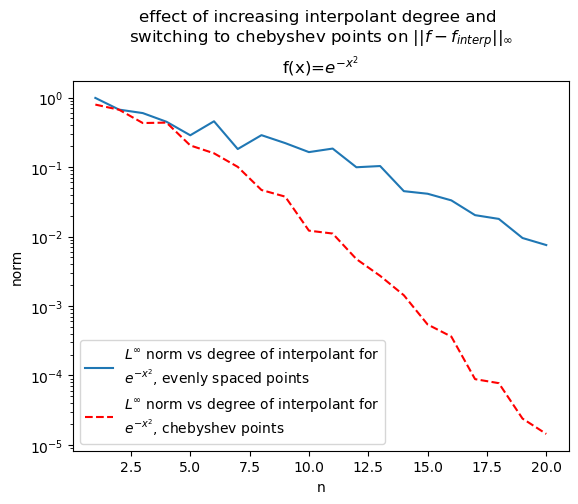

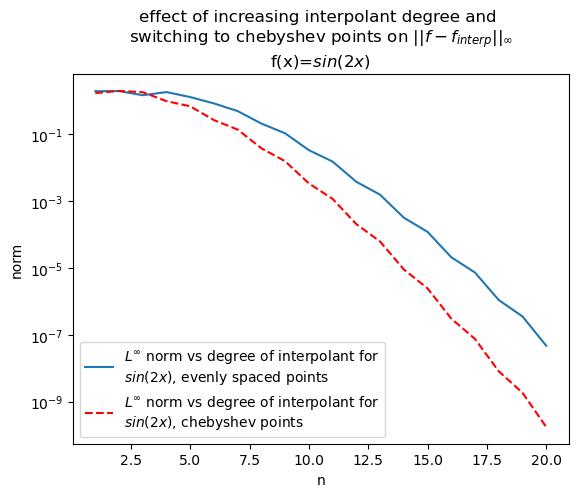

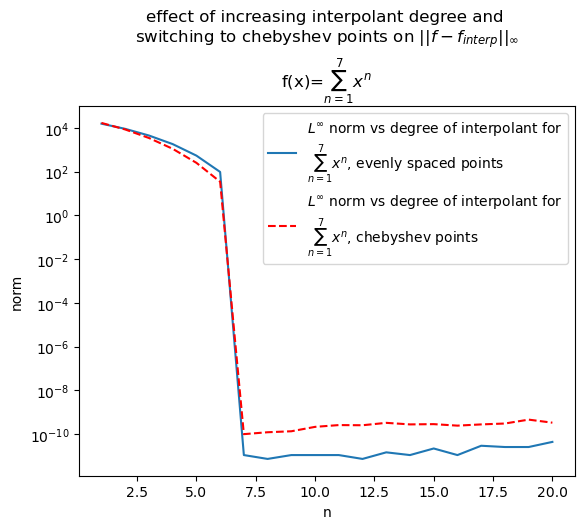

In [16]:
plot_norm(-2,4,Exp,'$e^{-x^2}$')
plot_norm(-2,4,Sin,'$sin(2x)$')
plot_norm(-2,4,Poly,'$\sum_{n=1}^7 x^n$')